In [72]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np 
cmap = sns.cm.rocket_r
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

%matplotlib inline

In [11]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [118]:
dist_df = pd.read_csv('distritos.csv', sep=';')
dist_df = dist_df[dist_df['cod_municipio'] == 36].copy()

In [134]:
all_codes = dist_df.sort_values(by='cod_distrito')['cod_distrito'].unique()
all_nomes = dist_df.sort_values(by='cod_distrito')['distrito'].unique()

In [158]:
len(all_codes)

96

In [110]:
centro_zones = ['Bela Vista','Bom Retiro','Cambuci','Consolação',
          'Liberdade','República','Santa Cecília','Sé']

centro_codes = dist_df[dist_df['nome'].isin(centro_zones)].sort_values(by='cod_distrito')['cod_distrito'].values
centro_nomes = dist_df[dist_df['nome'].isin(centro_zones)].sort_values(by='cod_distrito')['nome'].values

In [102]:
leste_zones = ['Aricanduva', 'Carrão', 'Vila Formosa', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Ponte Rasa', 'Guaianases',
'Lajeado', 'Itaim Paulista', 'Vila Curuçá', 'Cidade Líder', 'Itaquera', 'José Bonifácio', 'Parque do Carmo', 'Água Rasa',
'Belém', 'Brás', 'Moóca', 'Pari', 'Tatuapé', 'Artur Alvim', 'Cangaíba', 'Penha', 'Vila Matilde', 'Iguatemi', 'São Mateus',
'São Rafael', 'Jardim Helena', 'São Miguel', 'Vila Jacuí', 'São Lucas', 'Sapopemba', 'Vila Prudente', 'Cachoeirinha', 
'Casa Verde']

leste_codes = dist_df[dist_df['nome'].isin(leste_zones)].sort_values(by='cod_distrito')['cod_distrito'].values
leste_nomes = dist_df[dist_df['nome'].isin(leste_zones)].sort_values(by='cod_distrito')['nome'].values

In [107]:
norte_zones = ['Limão', 'Brasilândia', 'Freguesia do Ó', 'Jaçanã', 'Tremembé', 'Anhanguera', 'Perus', 'Jaraguá', 'Pirituba',
'São Domingos', 'Mandaqui', 'Santana', 'Tucuruvi', 'Vila Guilherme', 'Vila Maria', 'Vila Medeiros']

norte_codes = dist_df[dist_df['nome'].isin(norte_zones)]['cod_distrito'].values
norte_nomes = dist_df[dist_df['nome'].isin(norte_zones)].sort_values(by='cod_distrito')['nome'].values

In [5]:
zona_dist_dict = {}
for i, row in dist_df[['zona', 'cod_distrito']].iterrows():
    zona_dist_dict[row['zona']] = row['cod_distrito']

In [139]:
def make_dist_dic(relations=['home', 'school', 'work', 'neighbor']):
    dist_dic = {}

    for d in dist_df[dist_df['cod_municipio'] == 36]['cod_distrito'].unique():
        dist_dic[int(d)] = defaultdict(int)

    for x,y,z in G.edges(data=True):
        if z['edge_type'] in relations: 
            home_x = zona_dist_dict[int(G.nodes[x]['home'])]
            home_y = zona_dist_dict[int(G.nodes[y]['home'])]
            dist_dic[home_x][home_y] += 1
            dist_dic[home_y][home_x] += 1
    
    return dist_dic

In [180]:
def make_df(region_codes, region_dic):
    region_dic = { new_key: dist_dic[new_key] for new_key in region_codes}
    print(len(region_dic.keys()))
    
    df = pd.DataFrame.from_dict(region_dic).T
    df = df[list(region_codes)]
    df = df.dropna(how='all').T.fillna(0).sort_index()
    df = df.reindex(sorted(df.columns), axis=1)

    return df

def make_heatmap(df, labels, name, vmax=1500):
    fig, ax = plt.subplots(figsize=(12,10))

    fig = sns.heatmap(df, annot=False, cmap=cmap, vmax=vmax)
    print(df.shape)
    
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    #ax.set_aspect('equal','box')
    
    plt.savefig(name)
    
    plt.show()

96
(96, 96)


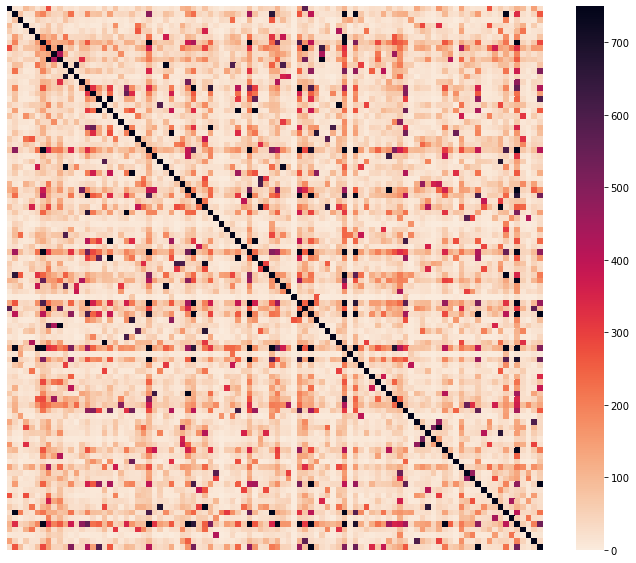

In [177]:
dist_dic = make_dist_dic()
df_all = make_df(all_codes, dist_dic)
make_heatmap(df_all, all_nomes, vmax=750, name='all_heatmap_regions.pdf')

8
(8, 8)


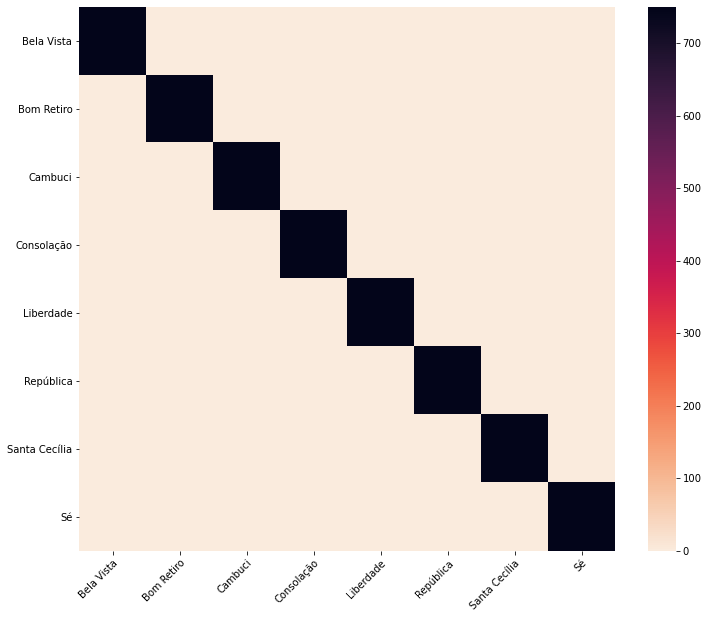

In [184]:
dist_dic = make_dist_dic(['home', 'neighbor'])
df_centro = make_df(centro_codes, dist_dic)
make_heatmap(df_centro, centro_nomes, vmax=750, name='all_heatmap_centro.pdf')

27
(27, 27)


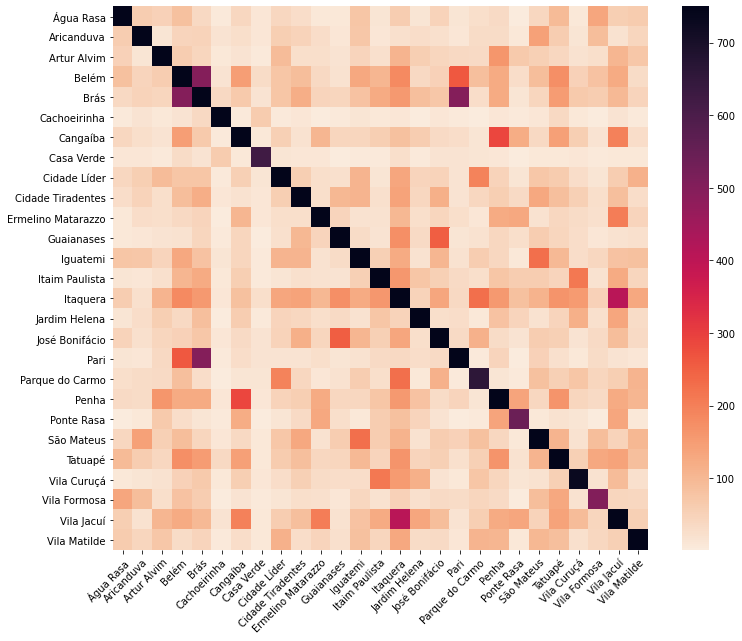

In [190]:
dist_dic = make_dist_dic(['work'])
df_leste = make_df(leste_codes, dist_dic)
make_heatmap(df_leste, leste_nomes, vmax=750, name='all_heatmap_works_leste.pdf')

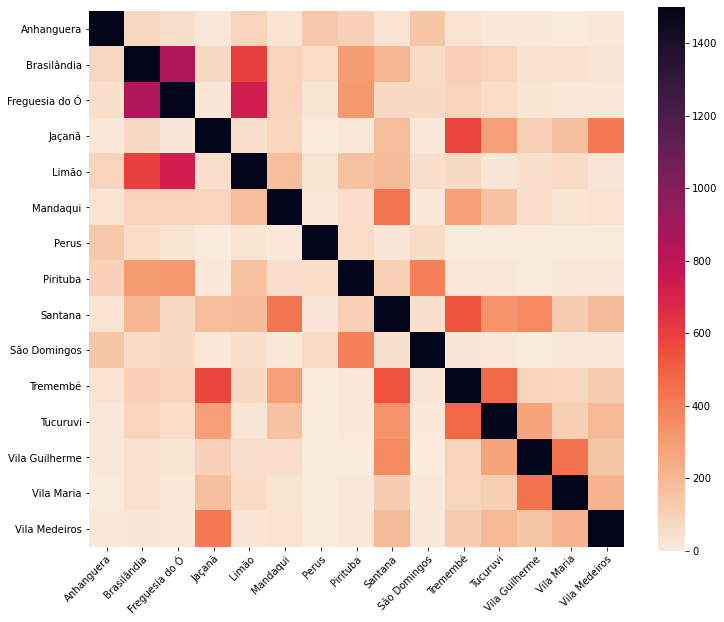

In [108]:
df_norte = make_df(norte_codes)
make_heatmap(df_norte, norte_nomes)

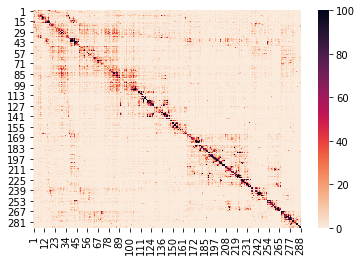

In [117]:
df = pd.DataFrame.from_dict(zones_dic).T.fillna(0)
df = df.reindex(sorted(df.columns), axis=1)
sns.heatmap(df.loc[:288, :288], annot=False, cmap=cmap, vmax=100)


In [5]:
def make_heatmap(people_dict, title, filename):
    df = pd.DataFrame.from_dict(people_dict).T.fillna(0)
    df = df.sort_values(by='age').reset_index(drop=True)
    df['age'] = pd.cut(df.age, bins=bins, labels=labels)
    df = df.set_index(df.age).drop('age', axis=1)
    df.columns = pd.cut(df.columns.to_list(), bins=bins, labels=labels)
    df = df.groupby(df.columns, axis=1).sum()
    df = df.groupby('age').mean()
    df = df.reindex(sorted(df.columns, reverse=True), axis=1).T
    df.rename(columns = {df.columns[-1]: str(df.columns[-1]) + '+'}, inplace=True)
    df.rename(index = {df.index[0]: str(df.index[0]) + '+'}, inplace=True)
    sns.heatmap(df, annot=False, vmin=0, vmax=10, cmap=cmap)
    plt.title(title, fontsize=18)
    plt.ylabel('Age of Contact', fontsize=16)
    plt.xlabel('Age of Person', fontsize=16)
    plt.savefig(f'{filename}.png', dpi=300)

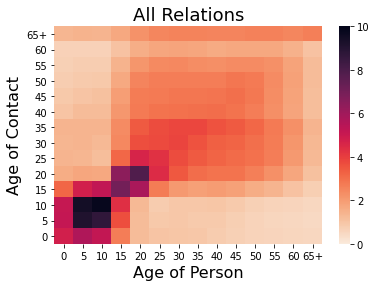

In [13]:
make_heatmap(people, 'All Relations', 'heatmap_no_restriction')

In [7]:
people_no_schools = {}

for i,person in enumerate(G.nodes()):
    people_no_schools[i] = defaultdict(int)
    people_no_schools[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'school':
            people_no_schools[i][G.nodes[y]['age']] += 1

In [8]:
np.unique([z['edge_type'] for x,y,z in G.edges(data=True)])

array(['home', 'neighbor', 'school', 'work'], dtype='<U8')

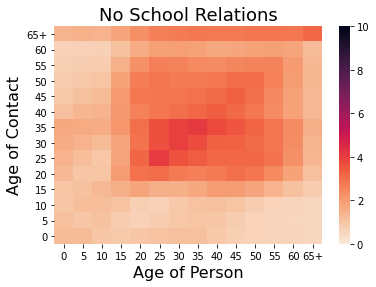

In [9]:
make_heatmap(people_no_schools, 'No School Relations', 'heatmap_no_schools')

In [11]:
people_no_work = {}

for i,person in enumerate(G.nodes()):
    people_no_work[i] = defaultdict(int)
    people_no_work[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'work':
            people_no_work[i][G.nodes[y]['age']] += 1

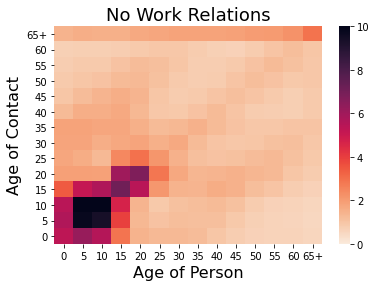

In [12]:
make_heatmap(people_no_work, 'No Work Relations', 'heatmap_no_work')

In [ ]:
for z in range(1,340):
    l = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == z]
    print(len(l))

In [ ]:
edges = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == 1]
s = nx.MultiGraph(edges)

In [ ]:
s.nodes()

In [ ]:
nx.write_gml(nx.relabel_nodes(s, lambda x: str(x)), 'subgraph_work.gml')


In [ ]:
import json
with open('work_subgraph.json', 'w') as f:
    f.write(json.dumps(nx.cytoscape_data(nx.relabel_nodes(s, lambda x: str(x)))))


In [ ]:
nx.draw(nx.relabel_nodes(s, lambda x: str(x)), node_size=15)